   sqft_living        price
0         1461  169277.0525
1         1462  187758.3940
2         1463  183583.6836
3         1464  179317.4775
4         1465  150730.0800


Intercept: [-462.37507916]
Coefficient(s): [[32.7921639]]
A 10cm fish is exected to have a weight of: -134.45 grams.
Root Mean Squared Error: 143.40 grams.
R2 Score: 0.84
Multivariate model:
Root Mean Squared Error: 120.86 grams.
R2 Score: 0.89


Intercept: [17.44327987]
Coefficient(s): [[0.26794212]]
Second degree polynomial features model:
Root Mean Squared Error: 46.23 grams.
R2 Score: 0.98
Third degree polynomial features model:
Root Mean Squared Error: 31.16 grams.
R2 Score: 0.99
Univariate Linear Regression Model:
Root Mean Squared Error: 0.00 Australian dollars.
R2 Score: 1.00
Ridge Regression Model Low Regularization:
Root Mean Squared Error: 0.01 Australian dollars.
R2 Score: 1.00

Intercept: 2.866323907455013
Coefficient for bedroom: 0.810155781277709


Ridge Regression Model High Regularization:
Root Mean Squared Error: 0.79 Australian dollars.
R2 Score: 0.19

Intercept: 2.866323907455013
Coefficient for bedroom: 0.08539028875829353
Lasso Regression Model Low Regularization:
Root Mean Squared Error: 0.88 Australian dollars.
R2 Score: -0.00

Intercept: 2.866323907455013
Coefficient for bedroom: 0.0


Lasso Regression Model High Regularization:
Root Mean Squared Error: 0.88 Australian dollars.
R2 Score: -0.00

Intercep

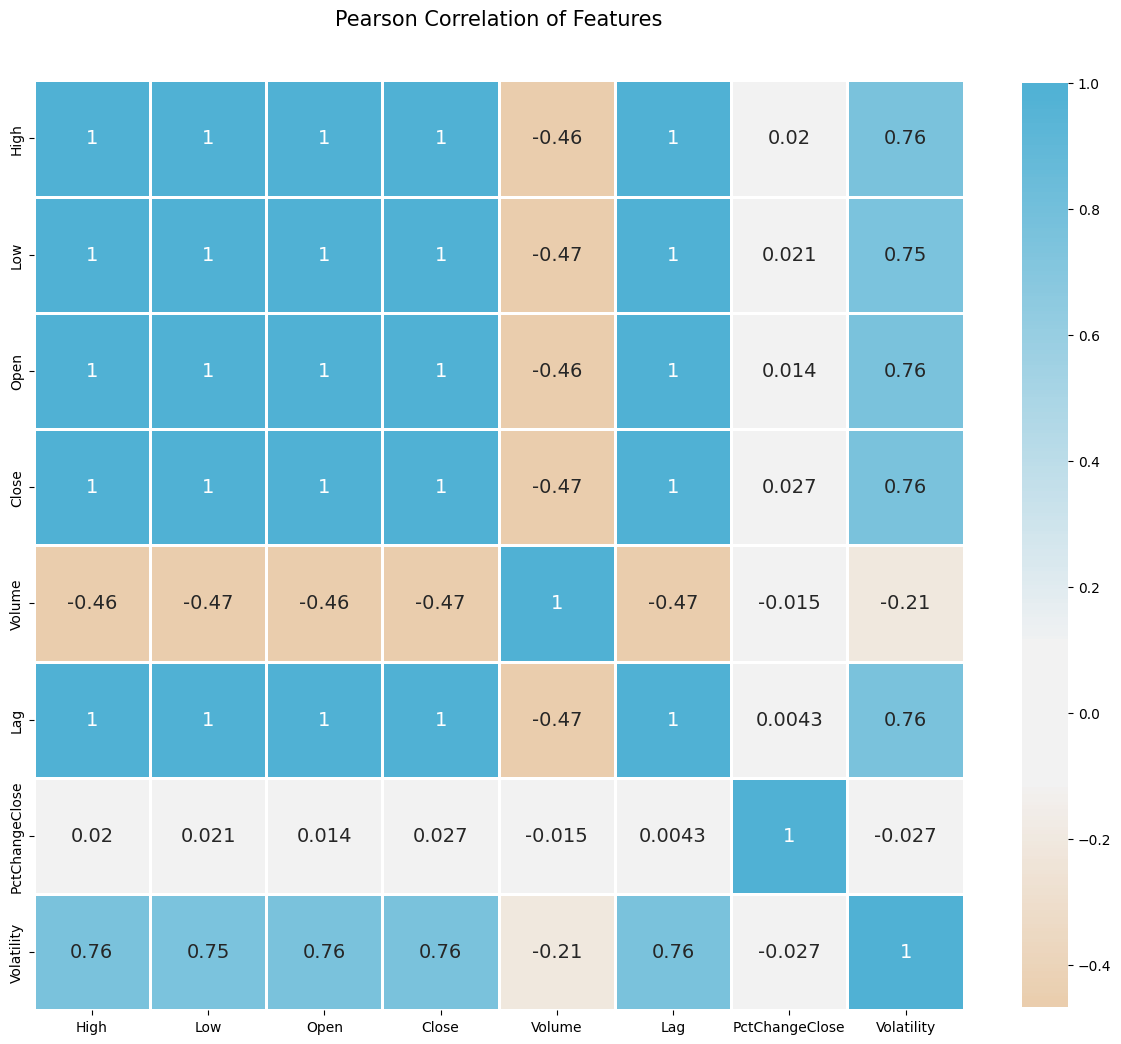

Results on training data:
Linear regression train RMSE: 21.20
Random forest train RMSE: 8.23
Gradient boosting train RMSE: 9.27

Results on testing data:
Linear regression test root mean squared error: 19.44
Random forest test root mean squared error: 19.53
Gradient boosting test root mean squared error: 22.26

Intercept: 42.699268476740045
Coefficient for trip_duration: -11.08872867130032
Coefficient for distance_traveled: 8.358910375066671
Coefficient for num_of_passengers: 0.0060250418502114655
Coefficient for tip: -0.0008499691290762001
Coefficient for surge_applied: 0.005403303154911221
Results on training data:
Linear regression train mean absolute error: 21.23
Random forest train mean absolute error: 8.60
Gradient boosting train mean absolute error: 15.82


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

def plot_linear_regression(regressor, X, y, info_dict=None):

    if info_dict == None:
        info_dict = {'Title': '', 'X_label': 'x', 'y_label': 'y'}

    # Making predictions
    y_pred = regressor.predict(X)

    # Creating scatter plot for actual data
    # Only use the first feature for the x-axis
    actual_data = go.Scatter(x=X[:, 0],
                             y=y.flatten(),
                             mode='markers',
                             name='Actual',
                             marker=dict(color=px.colors.qualitative.Plotly[0]))

    # Creating line plot for predicted data
    # Only use the first feature for the x-axis
    predicted_data = go.Scatter(x=X[:, 0],
                                y=y_pred.flatten(),
                                mode='lines',
                                name='Predicted',
                                line=dict(color='#555555', width=3))

    # Combining plots
    data = [actual_data, predicted_data]

    # Creating layout
    layout = go.Layout(title=info_dict['Title'],
                       title_font_size=24,
                       xaxis=dict(title=info_dict['X_label']),
                    yaxis=dict(title=info_dict['y_label']))

    # Creating figure and adding plots
    fig = go.Figure(data=data, layout=layout)

    # Increase plot size
    fig.update_layout(
        width=700,
        height=500
    )

    # Displaying the plot
    fig.show()
# Pandas is a library we use to format our data into a tidy dataframe
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset containing house price data
df = pd.read_csv('/content/sample_submission.csv')

# Some houses in our dataset have the price set as 0, so we remove them
print(df.head())


# Reshape our data either using array.reshape(-1, 1) it has a single feature/column
X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

# Create a linear regression model
model_lr = LinearRegression()

# Create a DataFrame for the input data
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model_lr.fit(X_train, y_train)

# Plotting info
info_dict= {'Title': 'House Prices', 'X_label': 'Property Size (sq ft)', 'y_label': 'Price (AUD)'}

# Plot the regression scatter plot
plot_linear_regression(model_lr, X_test, y_test, info_dict)
df = pd.read_csv("/content/Fish.csv")
df.head()
# Our x, independent variable
features = ["Length1"]

# Our y, dependent variable
target = ["Weight"]
from sklearn.linear_model import LinearRegression

# Create our linear regression model
model_lr = LinearRegression()

# This will select features with the name(s) we chose earlier
X = df[features]

# This will convert our X data from a dataframe to a numpy array of shape (n, 1)
# where n is the number of data samples, and 1 indicates it's a column
X = X.values

# This will make a column of our target data
y = df[target]

# This converts our target data to a numpy array
y = y.values

# sklearn will automatically fit our linear regression model for us
model_lr.fit(X, y)

# Plotting info
info_dict= {'Title': 'Fish Market', 'X_label': 'Fish Length', 'y_label': 'Weight'}

# Use the function with your linear regression model and data
plot_linear_regression(model_lr, X, y, info_dict)
print("Intercept:", model_lr.intercept_)
print("Coefficient(s):", model_lr.coef_)
# Predict the size of a fish of length 10cm
prediction = model_lr.predict(np.array([[10.0]]))
print(f"A 10cm fish is exected to have a weight of: {np.squeeze(prediction):.2f} grams.")
from sklearn.metrics import mean_squared_error

# Calculate predictions on the training data
y_pred = model_lr.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Root Mean Squared Error: {rmse:.2f} grams.")
from sklearn.metrics import r2_score

# Calculate R2 Score
r2 = r2_score(y, y_pred)

print(f"R2 Score: {r2:.2f}")
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
# This will select features with the name(s) we chose earlier
X = df[features]

# This will convert our X data from a dataframe to a numpy array
X = X.values

# sklearn will automatically fit our linear regression model for us
model_lr.fit(X, y)

# Calculate predictions on the training data
y_pred = model_lr.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R2 Score
r2 = r2_score(y, y_pred)

print("Multivariate model:")
print(f"Root Mean Squared Error: {rmse:.2f} grams.")
print(f"R2 Score: {r2:.2f}")
# Adding a new feature to represent the cubic measurement
df['CubicMeasurement'] = df['Length1'] * df['Height'] * df['Width']

# Our x, independent variable
features = ["CubicMeasurement"]

# This will select features with the name(s) we chose earlier
X = df[features]

# This will convert our X data from a dataframe to a numpy array
X = X.values

# Create and train our linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Plotting the data
plot_linear_regression(model_lr, X, y)

# Obtain the coefficient and intercept
print("Intercept:", model_lr.intercept_)
print("Coefficient(s):", model_lr.coef_)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
X = df[features]

degree = 2  # Set the degree of the polynomial features
model_lr = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model_lr.fit(X, y)

# Calculate predictions on the training data
y_pred = model_lr.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R2 Score
r2 = r2_score(y, y_pred)

print("Second degree polynomial features model:")
print(f"Root Mean Squared Error: {rmse:.2f} grams.")
print(f"R2 Score: {r2:.2f}")
degree = 3  # Set the degree of the polynomial features
model_lr = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model_lr.fit(X, y)

# Calculate predictions on the training data
y_pred = model_lr.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R2 Score
r2 = r2_score(y, y_pred)

print("Third degree polynomial features model:")
print(f"Root Mean Squared Error: {rmse:.2f} grams.")
print(f"R2 Score: {r2:.2f}")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Load dataset containing house price data
df = pd.read_csv('/content/test.csv')






# These are numeric features that we can use
numeric_features = ['bedroom', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'age']

target = ['price']


# A univariate model
X = df['bedroom'].values.reshape(-1, 1)
y = df['bedroom'].values.reshape(-1, 1)
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




# Create a linear regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Calculate predictions and metrics
y_pred = model_lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Univariate Linear Regression Model:")
print(f"Root Mean Squared Error: {rmse:.2f} Australian dollars.")
print(f"R2 Score: {r2:.2f}")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
model_ridge = Ridge(alpha=10)

# Train the model
model_ridge.fit(X_train, y_train)

# Calculate predictions and metrics
y_pred = model_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Model Low Regularization:")
print(f"Root Mean Squared Error: {rmse:.2f} Australian dollars.")
print(f"R2 Score: {r2:.2f}")
print("\nIntercept:", model_ridge.intercept_[0])
for feature, coefficient in zip(df[numeric_features].columns, model_ridge.coef_[0]):
    print(f"Coefficient for {feature}: {coefficient}")


# Create a linear regression model with higher regularization
model_ridge = Ridge(alpha=10000)

# Train the model
model_ridge.fit(X_train, y_train)

# Calculate predictions and metrics
y_pred = model_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n\nRidge Regression Model High Regularization:")
print(f"Root Mean Squared Error: {rmse:.2f} Australian dollars.")
print(f"R2 Score: {r2:.2f}")
print("\nIntercept:", model_ridge.intercept_[0])
for feature, coefficient in zip(df[numeric_features].columns, model_ridge.coef_[0]):
    print(f"Coefficient for {feature}: {coefficient}")
    from sklearn.linear_model import Lasso

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
model_lasso = Lasso(alpha=10)

# Train the model
model_lasso.fit(X_train, y_train)

# Calculate predictions and metrics
y_pred = model_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Model Low Regularization:")
print(f"Root Mean Squared Error: {rmse:.2f} Australian dollars.")
print(f"R2 Score: {r2:.2f}")
print("\nIntercept:", model_lasso.intercept_[0])
for feature, coefficient in zip(df[numeric_features].columns, model_lasso.coef_):
    print(f"Coefficient for {feature}: {coefficient}")


# Create a linear regression model with higher regularization
model_lasso = Lasso(alpha=30000)

# Train the model
model_lasso.fit(X_train, y_train)

# Calculate predictions and metrics
y_pred = model_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n\nLasso Regression Model High Regularization:")
print(f"Root Mean Squared Error: {rmse:.2f} Australian dollars.")
print(f"R2 Score: {r2:.2f}")
print("\nIntercept:", model_lasso.intercept_[0])
for feature, coefficient in zip(df[numeric_features].columns, model_lasso.coef_):
    print(f"Coefficient for {feature}: {coefficient}")
    # Stock market data
df = pd.read_csv("/content/GOOGL.csv")

# Use a slightly smaller number of data points
df = df.loc[df.Date > '2010-01-01'].reset_index()

df.head()
px.line(df, 'Date', 'Close', title="Google Stock Close Price Over Time (USD)")
# The np.log1p adds 1 to the value we're takign the log of
# Doing this prevents possible log(0) errors we may encounter otherwise
px.line(x=df.index, y=np.log1p(df.index), title="y = log(x)")
px.line(df, 'Date', np.log1p(df.Close), title = "log(price) Over Time (USD)")
model = LinearRegression()

# This is simply a list of numbers from 1 to n representing number of days
X = np.array(df.index).reshape(-1,1)

# The log transformed close price
y = np.array(np.log1p(df.Close)).reshape(-1,1)

model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R2 score of: {r2:.2f}")
df['Lag'] = df.Close.shift(1)
px.scatter(df.iloc[1:], 'Lag', 'Close')

df['PctChangeClose'] = df.Close.pct_change()
df['PctChangeLag'] = df.Lag.pct_change()
px.scatter(df.iloc[1:], 'PctChangeLag', 'PctChangeClose')
import pandas as pd
import numpy as np
import plotly.express as px

# Your code to calculate 'Volatility' column
df['Volatility'] = np.abs(df['High'] - df['Low'])

# Create the scatter plot
fig = px.scatter(df, x='Date', y='Volatility', title='Volatility Over Time')

# Add vertical black dotted lines at specific dates
fig.add_vline(x='2014-01-01', line_dash='dash', line_color='gray')
fig.add_vline(x='2018-01-01', line_dash='dash', line_color='gray')

blue = px.colors.qualitative.Plotly[0]
sky = px.colors.qualitative.Plotly[5]
purple = px.colors.qualitative.Plotly[3]

# Update the color of points based on their dates
fig.update_traces(
    marker=dict(
        color=np.select(
            [
                df['Date'] < '2014-01-01',
                (df['Date'] >= '2014-01-01') & (df['Date'] < '2018-01-01'),
                df['Date'] >= '2018-01-01'
            ],
            [sky, blue, purple]
        )
    )
)

# Show the plot
fig.show()
# Using the difference between the log values of high and low
df['LogVolatility'] = np.abs(np.log1p(df['High']) - np.log1p(df['Low']))


# Create the scatter plot
fig = px.scatter(df, x='Date', y='LogVolatility', title='Volatility Over Time')

# Add vertical black dotted lines at specific dates
fig.add_vline(x='2014-01-01', line_dash='dash', line_color='gray')
fig.add_vline(x='2018-01-01', line_dash='dash', line_color='gray')

blue = px.colors.qualitative.Plotly[0]
sky = px.colors.qualitative.Plotly[5]
purple = px.colors.qualitative.Plotly[3]

# Update the color of points based on their dates
fig.update_traces(
    marker=dict(
        color=np.select(
            [
                df['Date'] < '2014-01-01',
                (df['Date'] >= '2014-01-01') & (df['Date'] < '2018-01-01'),
                df['Date'] >= '2018-01-01'
            ],
            [sky, blue, purple]
        )
    )
)

# Show the plot
fig.show()
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

# Setting X and y for model
X = np.arange(len(df)).reshape(-1, 1)
y = df['Close'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predicted values and residuals
predicted = model.predict(X)
residuals = y - predicted

# Perform qqplot on residuals data from the model
qqplot_fig = qqplot(residuals, line='s')
qqplot_data = qqplot_fig.gca().lines
plt.close(qqplot_fig)  # Close the matplotlib figure without displaying it

# Plot
fig = go.Figure()

# Add scatter plot trace
fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {'color': blue}
})

# Add line trace
fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {'color': purple}
})

# Update layout
fig['layout'].update({
    'title': 'Residuals Quantile-Quantile Plot',
    'xaxis': {'title': 'Theoretical Quantiles'},
    'yaxis': {'title': 'Sample Quantiles'},
    'showlegend': False,
})

fig.show()
# Setting X and y for model, only this time we use the log transformed close
X = np.arange(len(df)).reshape(-1, 1)
y = np.log1p(df['Close'].values)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predicted values and residuals
predicted = model.predict(X)
residuals = y - predicted

# Perform qqplot on residuals data from the model
qqplot_fig = qqplot(residuals, line='s')
qqplot_data = qqplot_fig.gca().lines
plt.close(qqplot_fig)  # Close the matplotlib figure without displaying it

# Plot
fig = go.Figure()

# Add scatter plot trace
fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {'color': blue}
})

# Add line trace
fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {'color': purple}
})

# Update layout
fig['layout'].update({
    'title': 'Residuals Quantile-Quantile Plot',
    'xaxis': {'title': 'Theoretical Quantiles'},
    'yaxis': {'title': 'Sample Quantiles'},
    'showlegend': False,
})

fig.show()
import seaborn as sns
import matplotlib.pyplot as plt

feature_labels = ['High', 'Low', 'Open', 'Close', 'Volume', 'Lag', 'PctChangeClose', 'Volatility']
reduced_df = df[feature_labels]

f, ax = plt.subplots(figsize = (15, 15))
colormap = sns.diverging_palette(h_neg=45, h_pos=225, s=81, l=68, sep=30, center='light', as_cmap=True)

sns.heatmap(
    reduced_df.corr('pearson'),
    cmap=colormap,
    square=True,
    center=0,
    cbar_kws={'shrink': .8},
    ax=ax,
    annot=True,
    linewidths=2, vmax=1.0, linecolor='white',
    annot_kws={'fontsize': 14}
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()
# Data Loading
df = pd.read_csv("/content/train.csv")

# Data Cleaning
remove_0_columns = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'total_fare']
for col in remove_0_columns:
    df = df[df[col] > 0]
df = df[df['distance_traveled'] < 1000]
df = df[~((df['trip_duration'] > 36000) & (df['distance_traveled'] < 10))]

df.head()
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Defining Features
features = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip', 'surge_applied']
target = ['total_fare']
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sample = X_train.sample(200, random_state=42)
y_train_sample = y.loc[X_train_sample.index]

# Model Building and Prediction - Linear regression
model_lr = LinearRegression()
model_lr.fit(X_train_sample, y_train_sample)
y_pred_train_lr = model_lr.predict(X_train_sample)
y_pred_test_lr = model_lr.predict(X_test)
# RMSE Calculation - Linear Regression
rmse_train_lr = np.sqrt(mean_squared_error(y_train_sample, y_pred_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))

# Model Building and Prediction - Random forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train_sample, np.array(y_train_sample).ravel())  # Ravel line stops us getting a warning
y_pred_train_rf = model_rf.predict(X_train_sample)
y_pred_test_rf = model_rf.predict(X_test)
# RMSE Calculation - Random forest
rmse_train_rf = np.sqrt(mean_squared_error(y_train_sample, y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

# Model Building and Prediction - Gradient boosting Regressor
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train_sample, np.array(y_train_sample).ravel())
y_pred_train_gb = model_gb.predict(X_train_sample)
y_pred_test_gb = model_gb.predict(X_test)
# RMSE Calculation - Gradient boosting regressor
rmse_train_gb = np.sqrt(mean_squared_error(y_train_sample, y_pred_train_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))

print("Results on training data:")
print(f"Linear regression train RMSE: {rmse_train_lr:.2f}")
print(f"Random forest train RMSE: {rmse_train_rf:.2f}")
print(f"Gradient boosting train RMSE: {rmse_train_gb:.2f}")

print("\nResults on testing data:")
print(f"Linear regression test root mean squared error: {rmse_test_lr:.2f}")
print(f"Random forest test root mean squared error: {rmse_test_rf:.2f}")
print(f"Gradient boosting test root mean squared error: {rmse_test_gb:.2f}")


print("\nIntercept:", model_lr.intercept_[0])
for feature, coefficient in zip(X_train.columns, model_lr.coef_[0]):
    print(f"Coefficient for {feature}: {coefficient}")
    features = ['trip_duration', 'distance_traveled', 'num_of_passengers','tip', 'surge_applied']
target = ['total_fare']

train_df = df.loc[df.distance_traveled <= 25][features + target]
test_df = df.loc[df.distance_traveled > 25][features + target]

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]


# Linear regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_train_lr = model_lr.predict(X_train)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))

# Random forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, np.array(y_train).ravel()) # Ravel line stops us getting a warning
y_pred_train_rf = model_rf.predict(X_train)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))

# Gradient boosting regressor
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, np.array(y_train).ravel()) # Ravel line stops us getting a warning
y_pred_train_gb = model_gb.predict(X_train)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_pred_train_gb))

print("Results on training data:")
print(f"Linear regression train mean absolute error: {rmse_train_lr:.2f}")
print(f"Random forest train mean absolute error: {rmse_train_rf:.2f}")
print(f"Gradient boosting train mean absolute error: {rmse_train_gb:.2f}")

